In [2]:
# !conda install -y -c -q rdkit mordred-descriptor mordred molml matplotlib scikit-learn tensorflow pubchempy

Channels:
 - rdkit
 - mordred-descriptor
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64

done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - mordred


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mordred-1.2.0              |     pyhe5148d4_0         257 KB  mordred-descriptor
    networkx-3.3               |     pyhd8ed1ab_1         1.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  mordred            mordred-descriptor/noarch::mordred-1.2.0-pyhe5148d4_0 
  networkx           conda-forge/noarch::networkx-3.3-pyhd8ed1ab_1 



networkx-3.3         | 1.1 MB    |                                       |   0% 
networkx-3.3         | 1.1 MB    | #############

In [6]:
import os
import rdkit
import numpy as np
import pandas as pd
import pubchempy as pcp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors

from utils import GetDescriptors

In [8]:
df = pd.read_csv("/kaggle/input/oil-code/train_data_fix_concat.csv")
property_list = ['MolecularFormula', 'MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass',
                 'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount',
                 'IsotopeAtomCount', 'AtomStereoCount', 'Volume3D', 'FeatureCount3D',
                 'FeatureAcceptorCount3D', 'EffectiveRotorCount3D', 'ConformerCount3D']

descriptors_extractor = GetDescriptors(df)
descriptors_extractor.number_of_atoms(['C','O', 'N', 'Cl'])
descriptors_extractor.calculate_descriptors()
descriptors_extractor.download_descriptors(property_list)

Processing data: 100%|██████████| 51/51 [00:00<00:00, 235323.99it/s]


In [9]:
descriptors_extractor.smiles_df.to_csv('descriptors.csv')

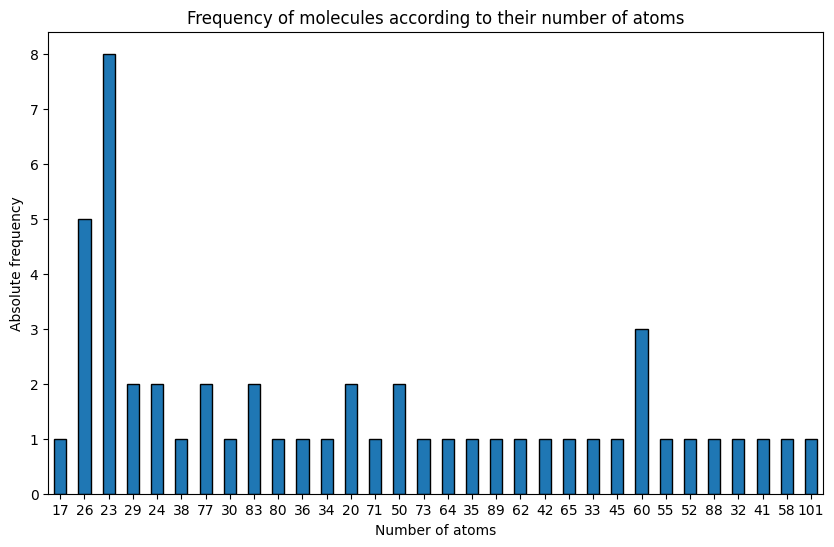

In [11]:
descriptors_extractor.smiles_df['num_of_atoms'].value_counts(sort=False).plot.bar(figsize=(10,6), 
                                                     title="Frequency of molecules according to their number of atoms", 
                                                     xlabel='Number of atoms',
                                                     ylabel='Absolute frequency',
                                                     rot=0,
                                                     edgecolor='k')
plt.show()

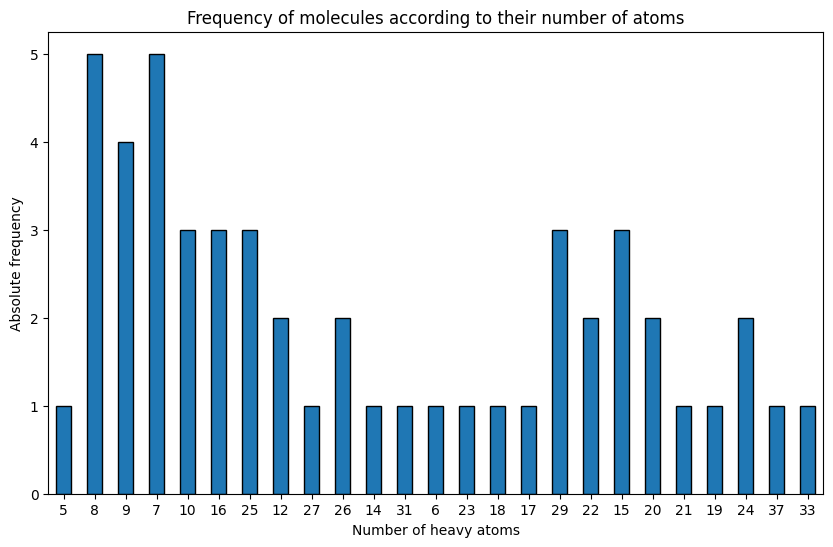

In [12]:
descriptors_extractor.smiles_df['num_of_heavy_atoms'].value_counts(sort=False).plot.bar(figsize=(10,6), 
                                                     title="Frequency of molecules according to their number of atoms", 
                                                     xlabel='Number of heavy atoms',
                                                     ylabel='Absolute frequency',
                                                     rot=0,
                                                     edgecolor='k')
plt.show()